In [1]:
import tweepy

In [2]:
API_KEY = 'hGwC17TsW1W99swjFCXPwi5i9'
API_SECRET = 'KmgC8oGcs7uvl9B7HDMi8KUUSAzsTPOPr3vHVt9XJOiks7C5Lw'
BEARER_TOKEN = 'AAAAAAAAAAAAAAAAAAAAAFqzcgEAAAAAh%2BilS8IkEYr68z%2BPlwkAGa0CAys%3Du3jZnN5YlQE3OS1hZUEq942I1fQ0kbriuNfuUyla7IqJKqL6CF'
ACCESS_TOKEN = '1519454932876808194-D8CTAAIZuvBdrqWuPecRSNX1p0S3cf'
ACCESS_TOKEN_SECRET = 'pUZatEZVOuTqBdFaBFAvts9A3hj3y7PvLaLKTpSIxUac9'

In [3]:
client = tweepy.Client(bearer_token=BEARER_TOKEN)

In [4]:
query = 'Lula ladrao OR Bolsonaro gado -is:retweet'

response = client.search_recent_tweets(query=query, max_results=100, tweet_fields=['created_at', 'public_metrics'], expansions=['author_id'])

In [5]:
tweets = [tweet for tweet in response.data]
first = tweets[0]
print(first['author_id'])

1530301549041295360


In [6]:
save_tweets = open('Tweets.txt', 'a')

for tweet in tweets:
    first_line = str(tweet['author_id']) + " " + tweet['text'] + "\n"     
    save_tweets.write(first_line)
    second_line = "retweet_count: " +  str(tweet.public_metrics['retweet_count']) + ", " + "reply_count: " + str(tweet.public_metrics['reply_count']) + ", " + "like_count: " + str(tweet.public_metrics['like_count']) + ", " + "quote_count: " + str(tweet.public_metrics['quote_count']) + "\n"
    save_tweets.write(second_line)
save_tweets.close()

In [7]:
read_tweets = open('Tweets.txt', 'r')
user_tweets = []
public_metrics = []
read = read_tweets.read().split('\n')

word = ''
for i in read:
    if i.find('retweet_count: ') != -1:
        public_metrics.append(i)
        user_tweets.append(word)
        word = ''
        continue        
    word += i 

read_tweets.close()

In [8]:
retweet_count = []
reply_count = []
like_count = []
quote_count = []

numbers = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
count = 0

for i in public_metrics:
    number = ''
    for j in i:
        if j in numbers:
            number += j
        if j == ',':
            if count == 0:
                retweet_count.append(int(number))
                number = ''
                count += 1
            elif count == 1:
                reply_count.append(int(number))
                number = ''
                count += 1
            elif count == 2:
                like_count.append(int(number))
                number = ''
                count += 1
    if i.endswith(number):
        quote_count.append(int(number))
        number = ''
        count = 0 

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
total_retweets = sum(retweet_count)
total_reply = sum(reply_count)
total_like = sum(like_count)
total_quote = sum(quote_count)

Text(0.5, 0.98, 'Engagement')

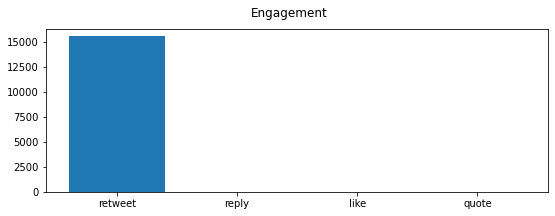

In [11]:
y_plot = ["retweet", "reply", "like", "quote"]
x_plot = [total_retweets, total_reply, total_like, total_quote]

fig, axs = plt.subplots(figsize=(9, 3), sharey=True)
axs.bar(y_plot, x_plot)
fig.suptitle('Engagement')

In [12]:
def getFollwersOfMostRetweetUser(user_tweets, retweet_count):
    index_max = retweet_count.index(max(retweet_count))
    user_with_most_retweets = user_tweets[index_max].split(" ")
    id_user = user_with_most_retweets[0]    
    
    followers = client.get_users_followers(int(id_user))
    
    return followers

print(getFollwersOfMostRetweetUser(user_tweets, retweet_count))

Response(data=[<User id=1504478017598345238 name=Lima Walmir username=LimaWalmir1>, <User id=1517626290198786049 name=ARQUEIRO CANTO DO GAVIÃO 🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷 username=arqga0>, <User id=4920626086 name=DomCorleone36k🇧🇷 username=DomCorleoneBRJ>, <User id=1131302601780322305 name=Deise Peres. oficial 🇧🇷 username=DeisePeres4>, <User id=1529589441005867008 name=João Rossi username=JooRoss66107975>, <User id=1445112383987400721 name=andre luiz quirino de paiva luiz username=andreluizquiri9>, <User id=1521582993185378309 name=Neytan Santana Silva -2️⃣2️⃣❤🇧🇷 username=neytan_santana>, <User id=1245492836742713347 name=Ezedequias Vitorino username=EzedequiasVito1>, <User id=1935935772 name=Eu Lia, tu Lias 🇧🇷🇲🇽 username=eu_liane>, <User id=1518103732738826240 name=Arthur Jose username=arthur221342>, <User id=232257529 name=Alexandre V Freitas username=thunder_270380>, <User id=1519668501329362948 name=Edi Bolsonaro username=BolsonaroEdi>, <User id=1529181117349249026 name=Tom Castilian username=TomCa

In [13]:
#famous tweets - waiting elevated access

# authorization of consumer key and consumer secret
auth = tweepy.OAuthHandler(API_KEY, API_SECRET)
  
# set access to user's access key and access secret 
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
  
# calling the api 
api = tweepy.API(auth)

# fetching the user
user = api.get_user(screen_name="DaniloGentili") #17.2M Followers
  
# fetching the ID
ID = user.id_str
  
print("The ID of the user is : " + ID)

Forbidden: 403 Forbidden
453 - You currently have Essential access which includes access to Twitter API v2 endpoints only. If you need access to this endpoint, you’ll need to apply for Elevated access via the Developer Portal. You can learn more here: https://developer.twitter.com/en/docs/twitter-api/getting-started/about-twitter-api#v2-access-leve